# INTRODUCCION:

En el complejo escenario financiero de Argentina, donde la alta inflación y las tasas de interés volátiles son la norma, la gestión y administración del riesgo son fundamentales, especialmente en el sector minorista. En esta presentación, exploraremos cómo el deterioro del comportamiento de pago afecta no solo a las instituciones financieras, sino también a sus clientes. Vamos a sumergirnos en un mundo donde el riesgo se convierte en una variable crucial que influye en varios aspectos, desde el financiamiento hasta la rentabilidad y la percepción pública.

Imagínense un escenario donde la toma de decisiones está plagada de incertidumbre, y cada movimiento puede tener un impacto profundo en la salud financiera de las instituciones y la calidad de vida de sus clientes. Hoy, embarcaremos en un viaje para comprender cómo mejorar la gestión de riesgos en el segmento de menores ingresos en Argentina se ha convertido en un desafío apremiante.

En esta viaje, exploraremos cómo:

1) Fondeo se ha vuelto una batalla estratégica en un entorno financiero incierto, donde la confianza de los inversionistas puede cambiar rápidamente.
2) Rentabilidad se ve directamente impactada por el comportamiento de pago y cómo las organizaciones deben adaptarse para mantener su margen.
3) Imagen Pública es vital, ya que las instituciones financieras deben navegar cuidadosamente en un mundo donde la percepción es tan importante como la realidad.

Los clientes enfrentan un costo de compra que está intrínsecamente ligado al riesgo del producto o segmento. 
La principal pregunta que debemos hacernos es:
* ¿Es posible en un escenario como el Actual de Argentina equilibrar la accesibilidad financiera?
* ¿Tenemos las herramientas que permitan realizar una elegibilidad de cliente para aplicar determinada tasa/riesgo, sin que sea solidaria respecto al resto?

# OBJETIVOS:
El objetivo central de nuestro proyecto es mejorar el proceso de calificación de clientes en el sector minorista de instituciones financieras, aprovechando la combinación de motores de decisión existentes en el mercado con nuestra vasta experiencia de 30 años en el mismo. Buscamos lograr una mejora significativa en la calidad de los servicios que ofrecemos, con un enfoque en los siguientes aspectos clave:
1) Calificación de Prospectos: Identificar características particulares y comportamientos de clientes actuales para perfeccionar la calificación de prospectos.
2) Mejora en los Servicios: Buscamos mejorar nuestros servicios en términos de oferta, plazos y tasas de crédito, con el objetivo de:
    * Incrementar los montos de dinero ofrecidos a los clientes.
    * Mejorar los plazos de crédito para nuestros clientes.
    * Reducir las tasas de interés ofrecidas.
3) Beneficios para la Organización: Esperamos que esta mejora en la calidad del servicio tenga un impacto positivo en diversos aspectos de la organización, incluyendo:
    * Mayor eficiencia en la segmentación de clientes.
    * Mejora en la gestión de riesgos y cobranzas.
    * Incremento en la rentabilidad.
    * Mejora en la gestión de fondeo.
    * Mejora en las previsiones financieras.
    * Cumplimiento de los requisitos de capital frente al BCRA.
    * Mejora en la imagen pública de la organización.
    * Exploración de nuevos segmentos de mercado.

# Preguntas a Responder con el Analisis:
* Establecer Grupos o Cluster con comportamientos similares.
    - Edad
    - Sexo
    - Segmento Socioeconomico
* Identificar comportamientos o patrones que permitan clasificarlos según:
    - Buenos Pagadores
    - Con Atraso (< 90 días)
    - Con Problemas (> 90 días)
    - Otros.
* Poder determinar cual es el mejor modelo de predicción que permita acercarnos más a este problema. 
    - Regresión Logistica
    - KNN
    - Random Forest

# LIBRERIAS:

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

#TRANSFORMACIONES:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#SPLIT:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#MODELOS:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#METRICAS:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from scipy.stats import randint


# INICIO PROYECTO FINAL

### OBTENER DATA SET:

In [4]:
evaluaciones = pd.read_csv('evaluaciones_2022.csv', delimiter=',')
evaluaciones.head()

,FECHA_EVALUACION,TX_SEXO,NU_EDAD,TX_PROVINCIA,TX_TIPO_CLIENTE,TX_ESTADO_EVALUACION_DWH,TX_CANAL_ORIGINAL,VL_INGRESO_NOSIS,VL_SCORE_NOSIS,VL_DESEMBOLSADO,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA,CD_SUBESTADO_PRODUCTO,NU_DIAS_MORA
0,20220110,FEMENINO,69,BUENOS AIRES,EXISTENTE,RECHAZADA,WHATSAPP,0,0.0,0.0,0.0,0.0,0.0,14,0,CANCELADO,0.0
1,20220119,MASCULINO,68,CAPITAL FEDERAL,EXISTENTE,RECHAZADA,API,0,0.0,0.0,0.0,0.0,0.0,14,0,CANCELADO,0.0
2,20220127,MASCULINO,65,CAPITAL FEDERAL,EXISTENTE,RECHAZADA,API,0,0.0,0.0,0.0,0.0,0.0,13,1,EXTRACONTABLE,0.0
3,20220119,MASCULINO,58,CAPITAL FEDERAL,EXISTENTE,RECHAZADA,API,0,0.0,0.0,0.0,0.0,0.0,14,0,CANCELADO,0.0
4,20220119,FEMENINO,56,CAPITAL FEDERAL,CONOCIDO,RECHAZADA,API,0,0.0,0.0,0.0,0.0,0.0,14,0,CANCELADO,0.0


### ANALISIS DEL DATA SET:
* Previo a Transformaciones

COLUMNAS:

In [5]:
evaluaciones.columns

Index(['FECHA_EVALUACION', 'TX_SEXO', 'NU_EDAD', 'TX_PROVINCIA',
       'TX_TIPO_CLIENTE', 'TX_ESTADO_EVALUACION_DWH', 'TX_CANAL_ORIGINAL',
       'VL_INGRESO_NOSIS', 'VL_SCORE_NOSIS', 'VL_DESEMBOLSADO', 'VL_CUOTA',
       'VL_TASA', 'CD_CAJON_MORA', 'NU_CUOTA_PAGADAS', 'NU_CUOTAS_EN_MORA',
       'CD_SUBESTADO_PRODUCTO', 'NU_DIAS_MORA'],
      dtype='object')

CUENTA DE REGISTROS:

In [6]:
evaluaciones.count()

FECHA_EVALUACION            2495204
TX_SEXO                     2495204
NU_EDAD                     2495204
TX_PROVINCIA                2495204
TX_TIPO_CLIENTE             2495204
TX_ESTADO_EVALUACION_DWH    2495204
TX_CANAL_ORIGINAL           2495204
VL_INGRESO_NOSIS            2495204
VL_SCORE_NOSIS              2495204
VL_DESEMBOLSADO             2495204
VL_CUOTA                    2495204
VL_TASA                     2495204
CD_CAJON_MORA               2495204
NU_CUOTA_PAGADAS            2495204
NU_CUOTAS_EN_MORA           2495204
CD_SUBESTADO_PRODUCTO       2495204
NU_DIAS_MORA                2495204
dtype: int64

INFORMACION: Tipo de Datos

In [7]:
evaluaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495204 entries, 0 to 2495203
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   FECHA_EVALUACION          int64  
 1   TX_SEXO                   object 
 2   NU_EDAD                   int64  
 3   TX_PROVINCIA              object 
 4   TX_TIPO_CLIENTE           object 
 5   TX_ESTADO_EVALUACION_DWH  object 
 6   TX_CANAL_ORIGINAL         object 
 7   VL_INGRESO_NOSIS          object 
 8   VL_SCORE_NOSIS            float64
 9   VL_DESEMBOLSADO           float64
 10  VL_CUOTA                  float64
 11  VL_TASA                   float64
 12  CD_CAJON_MORA             float64
 13  NU_CUOTA_PAGADAS          int64  
 14  NU_CUOTAS_EN_MORA         int64  
 15  CD_SUBESTADO_PRODUCTO     object 
 16  NU_DIAS_MORA              float64
dtypes: float64(6), int64(4), object(7)
memory usage: 323.6+ MB


DESCRIPCION: Datos Numéricos

In [8]:
evaluaciones.describe()

,FECHA_EVALUACION,NU_EDAD,VL_SCORE_NOSIS,VL_DESEMBOLSADO,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA,NU_DIAS_MORA
count,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06,2.495204e+06
mean,2.022068e+07,5.523088e+01,8.664553e+01,1.935192e+04,4.728042e+03,4.179888e+01,4.674668e-01,1.899733e+01,1.015497e+00,1.630187e+01
std,3.402944e+02,1.606226e+01,1.596378e+02,4.498970e+04,9.388150e+03,6.014045e+01,2.259305e+00,1.445451e+01,3.703153e+00,1.740059e+02
min,2.022010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.022041e+07,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00
50%,2.022071e+07,5.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00
75%,2.022100e+07,6.800000e+01,1.190000e+02,2.000097e+04,6.206970e+03,9.003000e+01,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00
max,2.022123e+07,9.900000e+01,9.990000e+02,2.000000e+06,1.723064e+05,2.990600e+02,2.200000e+01,8.400000e+01,6.000000e+01,1.049900e+04


CALCULO de APPROVAL: Agrupada por Canal
* Previo a Depurar Datos:

In [9]:
grupo_canal_estado = evaluaciones.groupby(['TX_CANAL_ORIGINAL', 'TX_ESTADO_EVALUACION_DWH']).size().unstack()
grupo_canal_estado['% Aprobada'] = (grupo_canal_estado['APROBADA'] / grupo_canal_estado.sum(axis=1)) * 100
grupo_canal_estado

TX_ESTADO_EVALUACION_DWH,APROBADA,RECHAZADA,% Aprobada
TX_CANAL_ORIGINAL,,,
0,NaN,5.0,NaN
API,67645.0,383223.0,15.003283
SAC,4910.0,6026.0,44.897586
SAC CBU,3037.0,1794.0,62.864831
SUCURSAL,1017814.0,486648.0,67.653021
TELEFONICO,8633.0,152.0,98.269778
TELEMARKETING,43730.0,37653.0,53.733581
TLMK CBU,15288.0,346.0,97.786875
WEB,20206.0,109050.0,15.632543


Conclusión:

* API y WEB, poseen el 15% de Approval, se refiere a clientes que se autogentionan, por los canales NO presenciales sin intervención Humana.
* TELEFONICO y TLMK CBU, con el mayor % de Approval, corresponde a solicitudes Finalizadas de por telefono por parte de la sucursal, en tiempo real, de forma reactiva al cliente.
* TELEMARKETING, con el 53% gestiones telefonicas, mayormente enfocadas en cliente conocidos.
* WHATSAPP, de la misma manera que API/WEB, corresponde a la atención NO presencial, pero con una convinación Hibrida, participando en la venta un humano.

El comportamiento de Pago Historico, fue moldeando los diferentes Approval para cada canal de contacto del cliente, definiendo que los canales NO PRESENCIALES, se corresponden a los canales de mayor riesgo de incobrabilidad.

TRANSFORMACION del DATA SET:
* Eliminar de la Variables "CD_SUBESTADO_PRODUCTO" = CANCELADO
* Eliminar los registros identificados con "0" de la Variable "VL_INGRESO_NOSIS" y "NC".


In [10]:
evaluaciones = evaluaciones[evaluaciones['CD_SUBESTADO_PRODUCTO'] != 'CANCELADO']
evaluaciones = evaluaciones[evaluaciones['VL_INGRESO_NOSIS'] != '0']
evaluaciones = evaluaciones[evaluaciones['VL_INGRESO_NOSIS'] != 'NC']
evaluaciones = evaluaciones[~evaluaciones['CD_SUBESTADO_PRODUCTO'].isin(['ANULADO', 'EXTRACONTABLE', 'NO LIQUIDADO'])]
evaluaciones = evaluaciones.reset_index(drop=True)
evaluaciones

,FECHA_EVALUACION,TX_SEXO,NU_EDAD,TX_PROVINCIA,TX_TIPO_CLIENTE,TX_ESTADO_EVALUACION_DWH,TX_CANAL_ORIGINAL,VL_INGRESO_NOSIS,VL_SCORE_NOSIS,VL_DESEMBOLSADO,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA,CD_SUBESTADO_PRODUCTO,NU_DIAS_MORA
0,20220103,FEMENINO,73,CAPITAL FEDERAL,NUEVO,APROBADA,API,D2,342.0,0.00,0.00,0.00,0.0,10,2,WRITE OFF,0.0
1,20220112,FEMENINO,74,MISIONES,NUEVO,RECHAZADA,WEB,D1,57.0,0.00,0.00,0.00,0.0,12,13,WRITE OFF,0.0
2,20220120,FEMENINO,44,CAPITAL FEDERAL,NUEVO,RECHAZADA,API,D2,129.0,0.00,0.00,0.00,0.0,23,1,WRITE OFF,0.0
3,20220121,FEMENINO,76,BUENOS AIRES,NUEVO,RECHAZADA,SUCURSAL,D1,530.0,0.00,0.00,0.00,0.0,28,0,PROBLEMAS,0.0
4,20220120,MASCULINO,66,BUENOS AIRES,EXISTENTE,APROBADA,SUCURSAL,D1,262.0,60831.09,7840.69,83.95,0.0,11,7,NO DEFINIDO,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214351,20221221,FEMENINO,76,CORDOBA,NUEVO,APROBADA,WHATSAPP,D1,466.0,0.00,0.00,0.00,8.0,0,8,MORA > 90,221.0
214352,20221226,MASCULINO,40,SANTA FE,NUEVO,APROBADA,API,D2,1.0,50000.00,18902.34,299.06,8.0,0,8,MORA > 90,221.0
214353,20221226,FEMENINO,28,BUENOS AIRES,NUEVO,RECHAZADA,WHATSAPP,C2,190.0,0.00,0.00,0.00,8.0,0,9,MORA > 90,235.0
214354,20221229,FEMENINO,79,BUENOS AIRES,NUEVO,APROBADA,WHATSAPP,D1,286.0,0.00,0.00,0.00,5.0,3,6,MORA > 90,146.0


### ANALISIS DEL DATA SET:
* Luego de Transformaciones

In [11]:
evaluaciones.count()

FECHA_EVALUACION            214356
TX_SEXO                     214356
NU_EDAD                     214356
TX_PROVINCIA                214356
TX_TIPO_CLIENTE             214356
TX_ESTADO_EVALUACION_DWH    214356
TX_CANAL_ORIGINAL           214356
VL_INGRESO_NOSIS            214356
VL_SCORE_NOSIS              214356
VL_DESEMBOLSADO             214356
VL_CUOTA                    214356
VL_TASA                     214356
CD_CAJON_MORA               214356
NU_CUOTA_PAGADAS            214356
NU_CUOTAS_EN_MORA           214356
CD_SUBESTADO_PRODUCTO       214356
NU_DIAS_MORA                214356
dtype: int64

In [12]:
evaluaciones['TX_ESTADO_EVALUACION_DWH'].value_counts()

TX_ESTADO_EVALUACION_DWH
APROBADA     152235
RECHAZADA     62121
Name: count, dtype: int64

In [13]:
evaluaciones['TX_CANAL_ORIGINAL'].value_counts()

TX_CANAL_ORIGINAL
SUCURSAL         141960
API               28660
WHATSAPP          26658
WEB                8429
TELEMARKETING      5692
TLMK CBU           1284
SAC                 738
TELEFONICO          577
SAC CBU             358
Name: count, dtype: int64

In [14]:
evaluaciones['CD_SUBESTADO_PRODUCTO'].describe()

count     214356
unique         7
top       AL DIA
freq      118277
Name: CD_SUBESTADO_PRODUCTO, dtype: object

In [15]:
rtdo_eval = evaluaciones['CD_SUBESTADO_PRODUCTO'].value_counts()  #Identificamos que el Estado "CANCELADO" Concentra la mayor cantidad de Registros
rtdo_eval

CD_SUBESTADO_PRODUCTO
AL DIA         118277
MORA > 90       65016
MORA < 90       21832
NO DEFINIDO      7676
WRITE OFF         881
PROBLEMAS         616
VENDIDO            58
Name: count, dtype: int64

In [16]:
evaluaciones['CD_SUBESTADO_PRODUCTO'].value_counts()

CD_SUBESTADO_PRODUCTO
AL DIA         118277
MORA > 90       65016
MORA < 90       21832
NO DEFINIDO      7676
WRITE OFF         881
PROBLEMAS         616
VENDIDO            58
Name: count, dtype: int64

##### Eliminar Ceros:

In [17]:
evaluaciones = evaluaciones[evaluaciones['TX_SEXO'] != '0']
evaluaciones = evaluaciones[evaluaciones['TX_CANAL_ORIGINAL'] != '0']

### PRIMEROS INSIGHTS

Agrupar por Estado y Canal:

In [18]:
evaluaciones.columns

Index(['FECHA_EVALUACION', 'TX_SEXO', 'NU_EDAD', 'TX_PROVINCIA',
       'TX_TIPO_CLIENTE', 'TX_ESTADO_EVALUACION_DWH', 'TX_CANAL_ORIGINAL',
       'VL_INGRESO_NOSIS', 'VL_SCORE_NOSIS', 'VL_DESEMBOLSADO', 'VL_CUOTA',
       'VL_TASA', 'CD_CAJON_MORA', 'NU_CUOTA_PAGADAS', 'NU_CUOTAS_EN_MORA',
       'CD_SUBESTADO_PRODUCTO', 'NU_DIAS_MORA'],
      dtype='object')

In [19]:
grupo_estado = evaluaciones.groupby(['TX_ESTADO_EVALUACION_DWH', 'TX_CANAL_ORIGINAL']).size().unstack()/100
grupo_estado = grupo_estado.fillna(0)
grupo_estado = grupo_estado.round(0)
grupo_estado['TOTAL'] = grupo_estado.sum(axis=1)
grupo_estado

TX_CANAL_ORIGINAL,API,SAC,SAC CBU,SUCURSAL,TELEFONICO,TELEMARKETING,TLMK CBU,WEB,WHATSAPP,TOTAL
TX_ESTADO_EVALUACION_DWH,,,,,,,,,,
APROBADA,141.0,4.0,2.0,1089.0,6.0,36.0,13.0,55.0,177.0,1523.0
RECHAZADA,146.0,4.0,1.0,330.0,0.0,21.0,0.0,30.0,90.0,622.0


CONCLUSIONES:
* Observamos que los canales presenciales, o al menos con atención hibrida, concentran la mayor cantidad de solicitudes (SUCURSAL y WHATSAPP).
* Canal API, desarrollado sobre todo para Comercializadores Externos, se ubica en 3er lugar.

GRAFICAR:

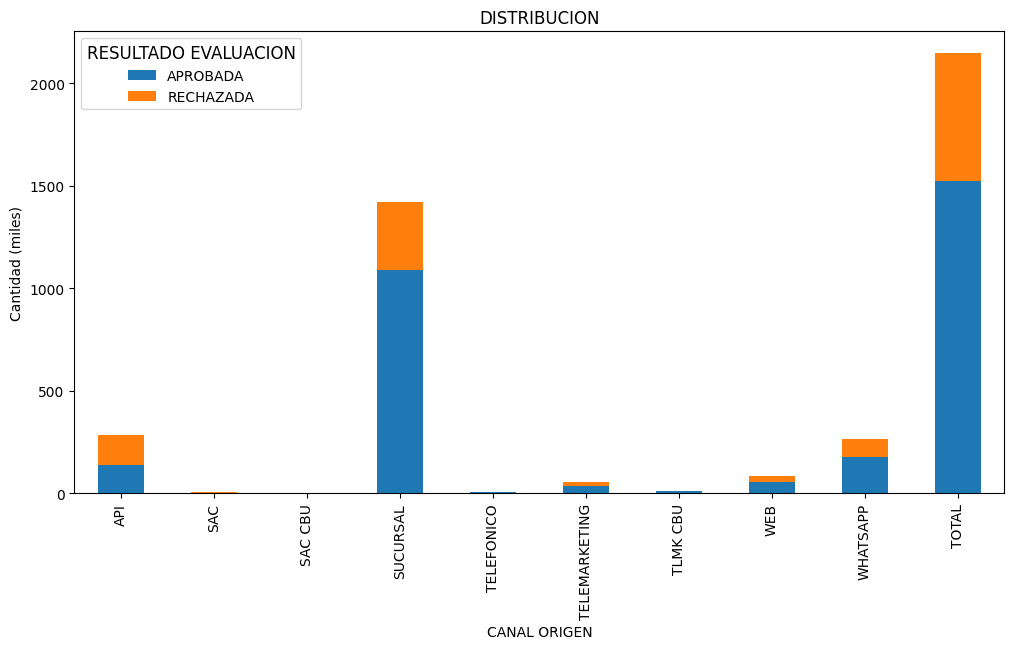

In [20]:
ax = grupo_estado.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('CANAL ORIGEN')
plt.ylabel('Cantidad (miles)')
plt.title('DISTRIBUCION')
plt.legend(title='RESULTADO EVALUACION', title_fontsize=12)
plt.show()

Agrupar por Estado y Tipo de Sexo:

In [21]:
grupo_sexo = evaluaciones.groupby(['TX_ESTADO_EVALUACION_DWH', 'TX_SEXO']).size().unstack()/100
grupo_sexo = grupo_sexo.fillna(0)
grupo_sexo = grupo_sexo.round(0)
grupo_sexo['TOTAL'] = grupo_sexo.sum(axis=1)

grupo_sexo

TX_SEXO,FEMENINO,MASCULINO,TOTAL
TX_ESTADO_EVALUACION_DWH,,,
APROBADA,950.0,572.0,1522.0
RECHAZADA,384.0,237.0,621.0


CONCLUSIONES:
* El Sexto Femenino, posee la mayor cantidad de consultas en valores absolutos, sino que tambien posee el mayor % de solicitudes aprobadas.

GRAFICAR:

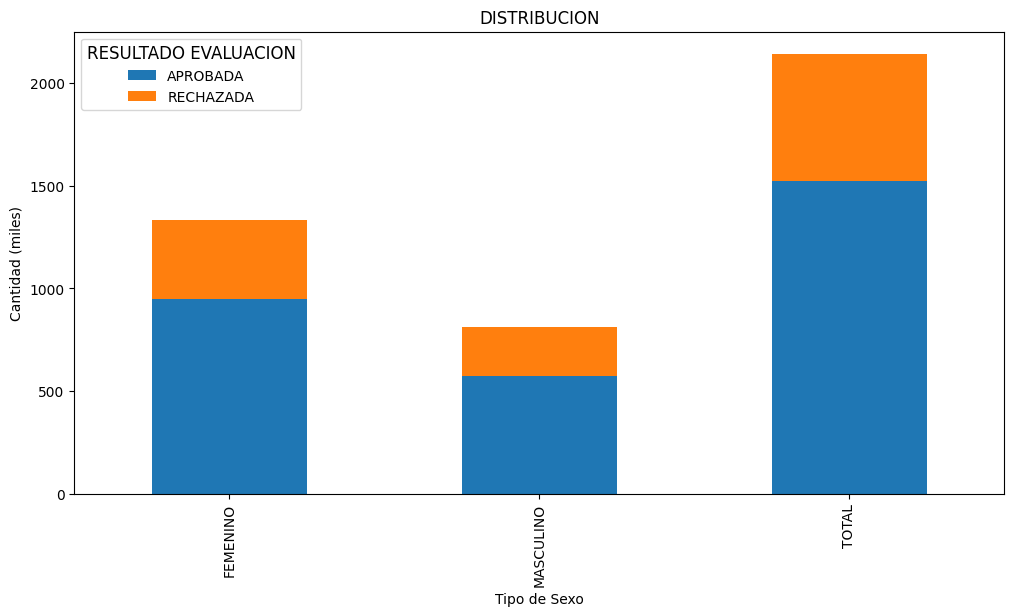

In [22]:
ax = grupo_sexo.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Tipo de Sexo')
plt.ylabel('Cantidad (miles)')
plt.title('DISTRIBUCION')
plt.legend(title='RESULTADO EVALUACION', title_fontsize=12)
plt.show()

Agrupar por Cajon de Mora y Tipo de Sexo:

In [23]:
grupo_cajon = evaluaciones.groupby(['CD_CAJON_MORA', 'TX_SEXO']).size().unstack()/1000
grupo_cajon = grupo_cajon.fillna(0)
grupo_cajon = grupo_cajon.round(0)
grupo_cajon

TX_SEXO,FEMENINO,MASCULINO
CD_CAJON_MORA,,
0.0,88.0,43.0
1.0,6.0,4.0
2.0,5.0,3.0
3.0,4.0,3.0
4.0,3.0,2.0
5.0,2.0,1.0
6.0,2.0,2.0
7.0,3.0,2.0
8.0,2.0,2.0


GRAFICAR:

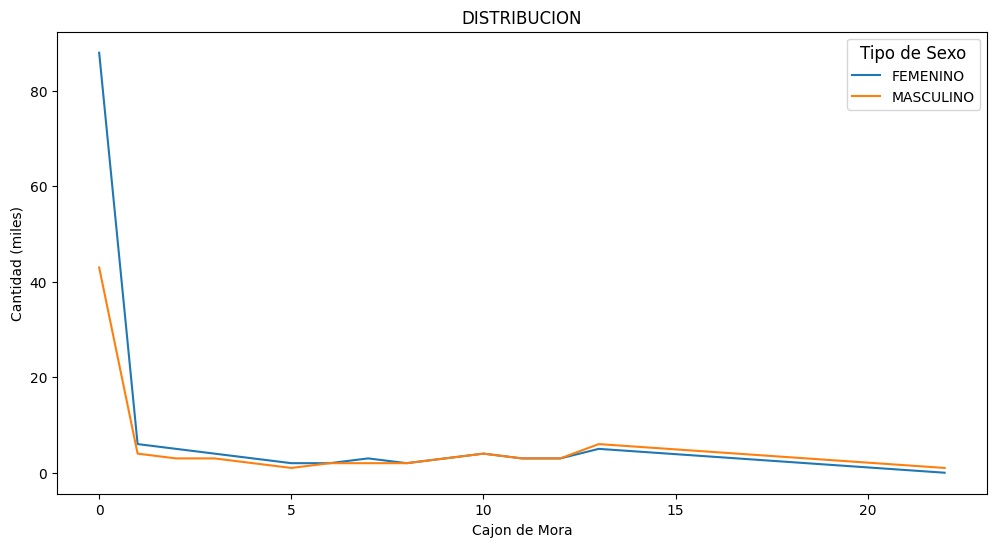

In [24]:
ax = grupo_cajon.plot(kind='line', figsize=(12, 6))
plt.xlabel('Cajon de Mora')
plt.ylabel('Cantidad (miles)')
plt.title('DISTRIBUCION')
plt.legend(title='Tipo de Sexo', title_fontsize=12)
plt.show()

Conclusión:
* Con este gráfico podemos observar una mayor cantidad de Clientes de Tipo Sexo Femenino en los primeros cajones de mora, es decir con un mejor comportamiento de pago.
* Observamos además que una vez alcanzado el cajon 5 se equilibran en cuanto a cantidad de clientes por sexo en cada "Cajón de Mora".

AGRUPAR por CANAL de ORIGEN y TIPO de CLIENTE

In [25]:
#CANTIDAD:

canal_tipo = evaluaciones.groupby(['TX_TIPO_CLIENTE','TX_CANAL_ORIGINAL']).size()
resultado_canal_tipo = canal_tipo.unstack()
resultado_canal_tipo

TX_CANAL_ORIGINAL,API,SAC,SAC CBU,SUCURSAL,TELEFONICO,TELEMARKETING,TLMK CBU,WEB,WHATSAPP
TX_TIPO_CLIENTE,,,,,,,,,
CONOCIDO,6868.0,630.0,293.0,93246.0,392.0,2785.0,858.0,2276.0,11853.0
EXISTENTE,2284.0,99.0,65.0,20103.0,177.0,994.0,286.0,384.0,2307.0
NUEVO,19502.0,9.0,NaN,28596.0,7.0,1913.0,140.0,5768.0,12478.0


In [26]:
#PORCENTAJES:
canal_tipo = evaluaciones.groupby(['TX_TIPO_CLIENTE','TX_CANAL_ORIGINAL']).size()
resultado_canal_tipo = canal_tipo.unstack()
resultado_canal_tipo_porc = resultado_canal_tipo.div(resultado_canal_tipo.sum(axis=1), axis=0) * 100
resultado_canal_tipo_porc

TX_CANAL_ORIGINAL,API,SAC,SAC CBU,SUCURSAL,TELEFONICO,TELEMARKETING,TLMK CBU,WEB,WHATSAPP
TX_TIPO_CLIENTE,,,,,,,,,
CONOCIDO,5.761697,0.528519,0.245803,78.225854,0.328856,2.336390,0.719793,1.909380,9.943709
EXISTENTE,8.554628,0.370800,0.243455,75.294955,0.662946,3.722986,1.071201,1.438256,8.640773
NUEVO,28.506278,0.013155,NaN,41.799073,0.010232,2.796252,0.204639,8.431146,18.239224


GRAFICAR:

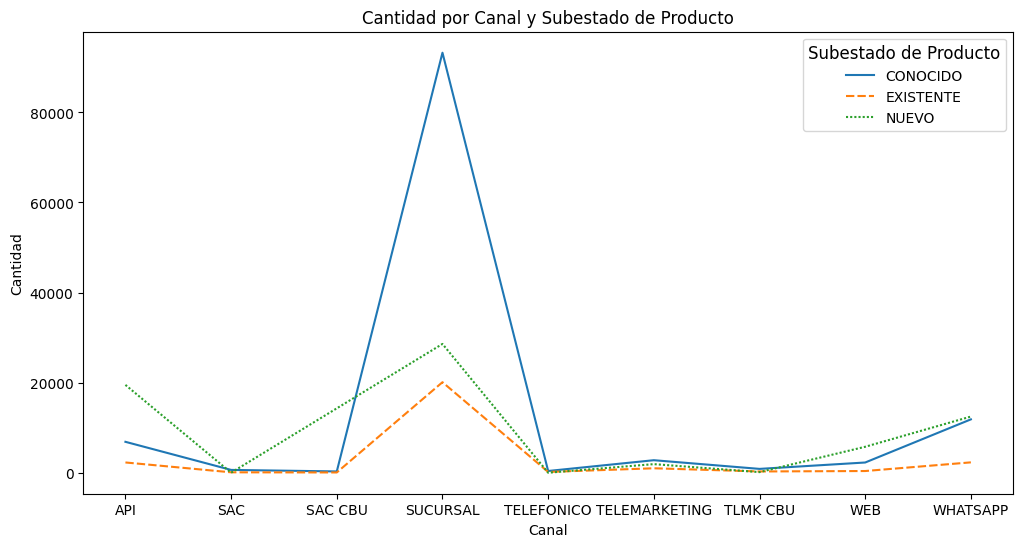

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=resultado_canal_tipo.T) 
plt.xlabel('Canal')
plt.ylabel('Cantidad')
plt.title('Cantidad por Canal y Subestado de Producto')
plt.legend(title='Subestado de Producto', title_fontsize='12')

plt.show()

CONCLUSIONES:
* Observamos que la mayor cantidad de Clientes **NUEVOS** ingresan por los canales tradicionales de atención, como es el Canal "SUCURSAL", en cuanto tambien podemos ver que el Canal "API", logra una mayor presencia vs. el resto de los canales NO Presenciales.
* En cuanto a clientes **Conocidos y Existente** vemos que tienen una mayor prediposción a los canales tradicionales de atención presencial o hibrida.

Agrupar por Cajon de Mora y Canal:

In [28]:
evaluaciones['TX_CANAL_ORIGINAL'].value_counts()

TX_CANAL_ORIGINAL
SUCURSAL         141945
API               28654
WHATSAPP          26638
WEB                8428
TELEMARKETING      5692
TLMK CBU           1284
SAC                 738
TELEFONICO          576
SAC CBU             358
Name: count, dtype: int64

In [29]:
grupo_canal = evaluaciones.groupby(['CD_CAJON_MORA', 'TX_CANAL_ORIGINAL']).size().unstack()/1000
grupo_canal = grupo_canal.fillna(0)
grupo_canal = grupo_canal.round(0)
grupo_canal

TX_CANAL_ORIGINAL,API,SAC,SAC CBU,SUCURSAL,TELEFONICO,TELEMARKETING,TLMK CBU,WEB,WHATSAPP
CD_CAJON_MORA,,,,,,,,,
0.0,9.0,1.0,0.0,101.0,0.0,3.0,1.0,3.0,12.0
1.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0
2.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
3.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
5.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
6.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
7.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
8.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0


GRAFICAR:

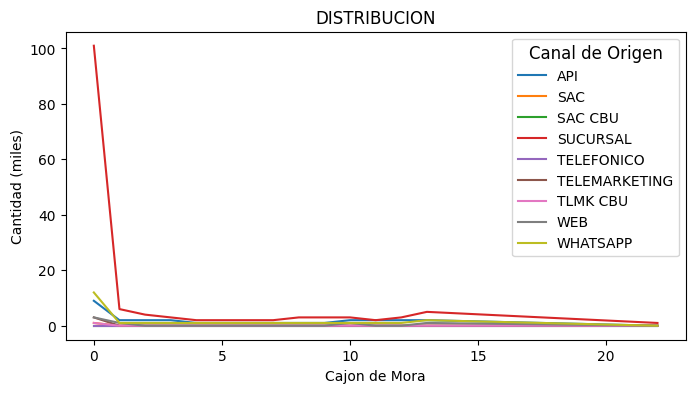

In [30]:
ax = grupo_canal.plot(kind='line', figsize=(8, 4))
plt.xlabel('Cajon de Mora')
plt.ylabel('Cantidad (miles)')
plt.title('DISTRIBUCION')
plt.legend(title='Canal de Origen', title_fontsize=12)
plt.show()

Agrupar por Tipo de Cliente y NOSiS:

In [31]:
evaluaciones['VL_INGRESO_NOSIS'].value_counts()

VL_INGRESO_NOSIS
D2    99267
D1    58808
C3    25301
C2    19899
C1     9729
B      1087
A       222
Name: count, dtype: int64

In [32]:
count = evaluaciones.groupby(['VL_INGRESO_NOSIS', 'TX_TIPO_CLIENTE']).size().unstack()
count['TOTAL'] = count.sum(axis=1)
count

TX_TIPO_CLIENTE,CONOCIDO,EXISTENTE,NUEVO,TOTAL
VL_INGRESO_NOSIS,,,,
A,110,37,75,222
B,453,223,411,1087
C1,4257,1790,3682,9729
C2,7019,3437,9443,19899
C3,9194,3245,12862,25301
D1,37678,10777,10353,58808
D2,60490,7190,31587,99267


GRAFICAR:

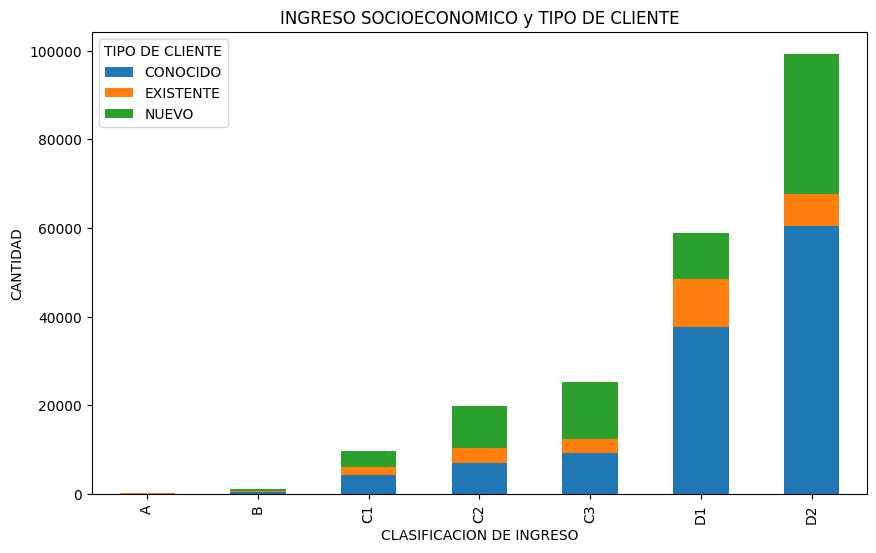

In [33]:
count.drop('TOTAL', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('INGRESO SOCIOECONOMICO y TIPO DE CLIENTE')
plt.xlabel('CLASIFICACION DE INGRESO')
plt.ylabel('CANTIDAD')
plt.legend(title='TIPO DE CLIENTE')

plt.show()

Conclusión:

Hacer un mejor analisis en cuanto a identificar en que caso existe le Evaluacion de motor lleva al cliente a NOSiS y cuando aplica solo la politica de crédito interna.

AGRUPAR por ESTADO y TIPO DE SEXO:

In [34]:
ag_tipo_sexo = evaluaciones.groupby(['CD_SUBESTADO_PRODUCTO','TX_SEXO']).size()
resultado_tipo_sexo = ag_tipo_sexo.unstack()
resultado_tipo_sexo

TX_SEXO,FEMENINO,MASCULINO
CD_SUBESTADO_PRODUCTO,,
AL DIA,79778,38484
MORA < 90,13236,8586
MORA > 90,34197,30801
NO DEFINIDO,5422,2254
PROBLEMAS,314,302
VENDIDO,26,32
WRITE OFF,389,492


In [35]:
ag_tipo_sexo = evaluaciones.groupby(['CD_SUBESTADO_PRODUCTO', 'TX_SEXO']).size()
resultado_tipo_sexo = ag_tipo_sexo.unstack()

resultado_tipo_sexo_porc = resultado_tipo_sexo.div(resultado_tipo_sexo.sum(axis=1), axis=0) * 100
resultado_tipo_sexo_porc

TX_SEXO,FEMENINO,MASCULINO
CD_SUBESTADO_PRODUCTO,,
AL DIA,67.458693,32.541307
MORA < 90,60.654385,39.345615
MORA > 90,52.612388,47.387612
NO DEFINIDO,70.635748,29.364252
PROBLEMAS,50.974026,49.025974
VENDIDO,44.827586,55.172414
WRITE OFF,44.154370,55.845630


GRAFICAR:

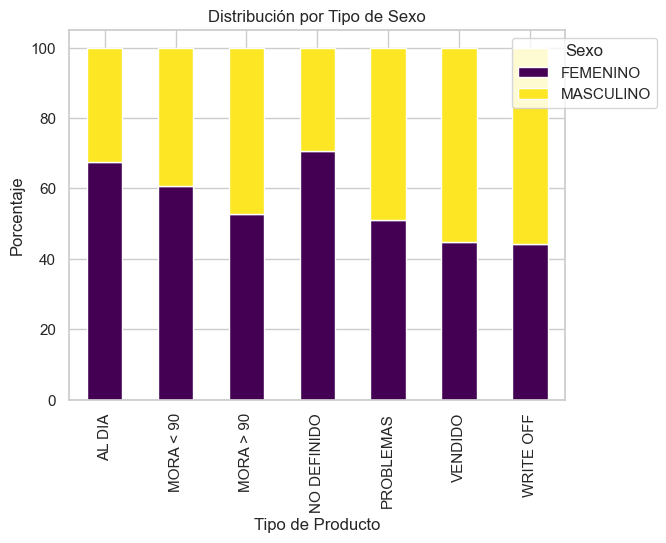

In [36]:
sns.set(style="whitegrid")
resultado_tipo_sexo_porc.plot(kind='bar', stacked=True, cmap="viridis")

plt.title('Distribución por Tipo de Sexo')
plt.xlabel('Tipo de Producto')
plt.ylabel('Porcentaje')
plt.legend(title='Sexo', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

CONCLUSIONES:
* Respecto a Comportmiento de pago, podemos decir que el sexo de Tipo "FEMENINO" tiene la mayor cantidad de solicitudes en la Clase "AL DIA", como tambien una mayor cantidad de solicitudes en -90, en cuando a +90 vemos que las clases se van equilibrando en cuanto al tipo de sexo.

Agrupar por Cajon de Mora y NOSiS:

In [37]:
grupo_nosis = evaluaciones.groupby(['CD_CAJON_MORA', 'VL_INGRESO_NOSIS']).size().unstack()/100
grupo_nosis = grupo_nosis.round(0)
grupo_nosis

VL_INGRESO_NOSIS,A,B,C1,C2,C3,D1,D2
CD_CAJON_MORA,,,,,,,
0.0,1.0,7.0,58.0,96.0,112.0,428.0,606.0
1.0,0.0,1.0,8.0,16.0,16.0,24.0,37.0
2.0,0.0,1.0,6.0,12.0,15.0,15.0,29.0
3.0,0.0,0.0,4.0,10.0,11.0,13.0,29.0
4.0,0.0,0.0,2.0,7.0,9.0,10.0,23.0
5.0,0.0,0.0,1.0,3.0,5.0,8.0,16.0
6.0,NaN,0.0,1.0,4.0,6.0,8.0,18.0
7.0,0.0,0.0,2.0,5.0,7.0,9.0,22.0
8.0,0.0,0.0,1.0,4.0,6.0,8.0,23.0


GRAFICAR:

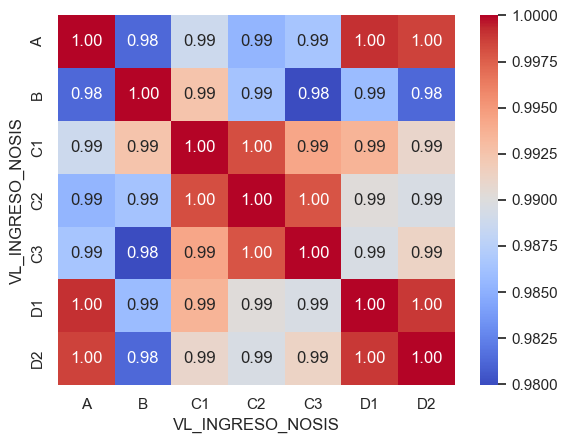

In [38]:
correlation_matrix = grupo_nosis.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

CALCULO de APPROVAL: Agrupada por Canal

In [39]:
grupo_canal_estado = evaluaciones.groupby(['TX_CANAL_ORIGINAL', 'TX_ESTADO_EVALUACION_DWH']).size().unstack()
grupo_canal_estado['% Aprobada'] = (grupo_canal_estado['APROBADA'] / grupo_canal_estado.sum(axis=1)) * 100
grupo_canal_estado

TX_ESTADO_EVALUACION_DWH,APROBADA,RECHAZADA,% Aprobada
TX_CANAL_ORIGINAL,,,
API,14091,14563,49.176380
SAC,365,373,49.457995
SAC CBU,230,128,64.245810
SUCURSAL,108915,33030,76.730424
TELEFONICO,569,7,98.784722
TELEMARKETING,3634,2058,63.843992
TLMK CBU,1272,12,99.065421
WEB,5475,2953,64.962031
WHATSAPP,17658,8980,66.288760


### ANALISIS y SELECCION de VARIABLES:
* Seleccionar que variables NO aportan al analisis o estan correlacionadas a otras variables del mismo data set.
* Determinar Variable Dependiente
* Determinar Variables Independientes
* Aplicar Metodos de Transformación de Variables Categoricas a Variables Numericas
    * One Hot Encoding
    * Label Encoding
    * Codificación Ordinal


COLUMNAS:

In [40]:
evaluaciones.columns

Index(['FECHA_EVALUACION', 'TX_SEXO', 'NU_EDAD', 'TX_PROVINCIA',
       'TX_TIPO_CLIENTE', 'TX_ESTADO_EVALUACION_DWH', 'TX_CANAL_ORIGINAL',
       'VL_INGRESO_NOSIS', 'VL_SCORE_NOSIS', 'VL_DESEMBOLSADO', 'VL_CUOTA',
       'VL_TASA', 'CD_CAJON_MORA', 'NU_CUOTA_PAGADAS', 'NU_CUOTAS_EN_MORA',
       'CD_SUBESTADO_PRODUCTO', 'NU_DIAS_MORA'],
      dtype='object')

COLUMNAS A ELIMINAR:

In [41]:
col_eliminar = ['FECHA_EVALUACION', 'TX_PROVINCIA','VL_DESEMBOLSADO', 'NU_DIAS_MORA']
evaluaciones = evaluaciones.drop(col_eliminar, axis=1)
evaluaciones = evaluaciones.reset_index(drop=True)
evaluaciones


,TX_SEXO,NU_EDAD,TX_TIPO_CLIENTE,TX_ESTADO_EVALUACION_DWH,TX_CANAL_ORIGINAL,VL_INGRESO_NOSIS,VL_SCORE_NOSIS,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA,CD_SUBESTADO_PRODUCTO
0,FEMENINO,73,NUEVO,APROBADA,API,D2,342.0,0.00,0.00,0.0,10,2,WRITE OFF
1,FEMENINO,74,NUEVO,RECHAZADA,WEB,D1,57.0,0.00,0.00,0.0,12,13,WRITE OFF
2,FEMENINO,44,NUEVO,RECHAZADA,API,D2,129.0,0.00,0.00,0.0,23,1,WRITE OFF
3,FEMENINO,76,NUEVO,RECHAZADA,SUCURSAL,D1,530.0,0.00,0.00,0.0,28,0,PROBLEMAS
4,MASCULINO,66,EXISTENTE,APROBADA,SUCURSAL,D1,262.0,7840.69,83.95,0.0,11,7,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214308,FEMENINO,76,NUEVO,APROBADA,WHATSAPP,D1,466.0,0.00,0.00,8.0,0,8,MORA > 90
214309,MASCULINO,40,NUEVO,APROBADA,API,D2,1.0,18902.34,299.06,8.0,0,8,MORA > 90
214310,FEMENINO,28,NUEVO,RECHAZADA,WHATSAPP,C2,190.0,0.00,0.00,8.0,0,9,MORA > 90
214311,FEMENINO,79,NUEVO,APROBADA,WHATSAPP,D1,286.0,0.00,0.00,5.0,3,6,MORA > 90


### INICIO ETAPAS de TRANSFORMACION:

VARIABLES/FEATURES CATEGORICAS:

In [42]:
evaluaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214313 entries, 0 to 214312
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TX_SEXO                   214313 non-null  object 
 1   NU_EDAD                   214313 non-null  int64  
 2   TX_TIPO_CLIENTE           214313 non-null  object 
 3   TX_ESTADO_EVALUACION_DWH  214313 non-null  object 
 4   TX_CANAL_ORIGINAL         214313 non-null  object 
 5   VL_INGRESO_NOSIS          214313 non-null  object 
 6   VL_SCORE_NOSIS            214313 non-null  float64
 7   VL_CUOTA                  214313 non-null  float64
 8   VL_TASA                   214313 non-null  float64
 9   CD_CAJON_MORA             214313 non-null  float64
 10  NU_CUOTA_PAGADAS          214313 non-null  int64  
 11  NU_CUOTAS_EN_MORA         214313 non-null  int64  
 12  CD_SUBESTADO_PRODUCTO     214313 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory us

In [43]:
categ_features = ['TX_SEXO','TX_ESTADO_EVALUACION_DWH','TX_CANAL_ORIGINAL','VL_INGRESO_NOSIS', 'TX_TIPO_CLIENTE']

APLICAR One Hot Encoding:

Definir Variables Independientes y Dependiente:

In [44]:
y = evaluaciones['CD_SUBESTADO_PRODUCTO']
X = evaluaciones.drop(columns=['CD_SUBESTADO_PRODUCTO'])


Stratify + Reindexar el Indice

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42, stratify=y)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace= True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

CUENTA REGISTROS Variable Dependiente:

In [46]:
y.count()

214313

CUENTA REGISTROS Variable Independiente:

In [47]:
X.count()

TX_SEXO                     214313
NU_EDAD                     214313
TX_TIPO_CLIENTE             214313
TX_ESTADO_EVALUACION_DWH    214313
TX_CANAL_ORIGINAL           214313
VL_INGRESO_NOSIS            214313
VL_SCORE_NOSIS              214313
VL_CUOTA                    214313
VL_TASA                     214313
CD_CAJON_MORA               214313
NU_CUOTA_PAGADAS            214313
NU_CUOTAS_EN_MORA           214313
dtype: int64

INFORMACION: Variable Independiente

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214313 entries, 0 to 214312
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TX_SEXO                   214313 non-null  object 
 1   NU_EDAD                   214313 non-null  int64  
 2   TX_TIPO_CLIENTE           214313 non-null  object 
 3   TX_ESTADO_EVALUACION_DWH  214313 non-null  object 
 4   TX_CANAL_ORIGINAL         214313 non-null  object 
 5   VL_INGRESO_NOSIS          214313 non-null  object 
 6   VL_SCORE_NOSIS            214313 non-null  float64
 7   VL_CUOTA                  214313 non-null  float64
 8   VL_TASA                   214313 non-null  float64
 9   CD_CAJON_MORA             214313 non-null  float64
 10  NU_CUOTA_PAGADAS          214313 non-null  int64  
 11  NU_CUOTAS_EN_MORA         214313 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 19.6+ MB


#### X_TRAIN:

VARIABLES (Features) CATEGORICAS:


In [49]:
categ_features = ['TX_SEXO','TX_ESTADO_EVALUACION_DWH','TX_CANAL_ORIGINAL','VL_INGRESO_NOSIS', 'TX_TIPO_CLIENTE']
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X_train [categ_features])
X_train_categ = ohe.transform(X_train[categ_features])
X_train_categ = pd.DataFrame(X_train_categ, columns=ohe.get_feature_names_out())
X_train_categ

,TX_SEXO_FEMENINO,TX_SEXO_MASCULINO,TX_ESTADO_EVALUACION_DWH_APROBADA,TX_ESTADO_EVALUACION_DWH_RECHAZADA,TX_CANAL_ORIGINAL_API,TX_CANAL_ORIGINAL_SAC,TX_CANAL_ORIGINAL_SAC CBU,TX_CANAL_ORIGINAL_SUCURSAL,TX_CANAL_ORIGINAL_TELEFONICO,TX_CANAL_ORIGINAL_TELEMARKETING,...,VL_INGRESO_NOSIS_A,VL_INGRESO_NOSIS_B,VL_INGRESO_NOSIS_C1,VL_INGRESO_NOSIS_C2,VL_INGRESO_NOSIS_C3,VL_INGRESO_NOSIS_D1,VL_INGRESO_NOSIS_D2,TX_TIPO_CLIENTE_CONOCIDO,TX_TIPO_CLIENTE_EXISTENTE,TX_TIPO_CLIENTE_NUEVO
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160729,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
160730,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
160731,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
160732,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Features NUMERICAS (Estandarizar/Normalizar):

In [50]:
numeric_features = ['NU_EDAD','VL_SCORE_NOSIS','VL_CUOTA','VL_TASA','CD_CAJON_MORA','NU_CUOTA_PAGADAS','NU_CUOTAS_EN_MORA']
ss= StandardScaler()
ss.fit(X_train [numeric_features]) 
X_train_numeric = ss.transform(X_train [numeric_features])
X_train_numeric = pd.DataFrame(X_train_numeric, columns= ss.get_feature_names_out())
X_train_numeric

,NU_EDAD,VL_SCORE_NOSIS,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA
0,0.986077,0.797247,-0.694321,-0.934567,-0.405320,3.419834,-0.482910
1,1.337656,0.909189,-0.350345,0.404332,-0.625994,2.481598,-0.709496
2,-1.181994,-0.697185,-0.014217,0.404332,-0.625994,2.213531,-0.709496
3,1.279059,0.948369,0.985605,0.075715,-0.625994,1.409329,-0.482910
4,0.634498,-0.999430,-0.694321,-0.934567,0.918720,-0.735209,1.103190
...,...,...,...,...,...,...,...
160729,0.868884,0.226340,-0.694321,-0.934567,-0.625994,1.677397,-0.709496
160730,-0.596029,0.685304,-0.694321,-0.934567,0.698047,-0.065041,0.650018
160731,0.400112,0.450225,-0.694321,-0.934567,-0.625994,-0.065041,-0.709496
160732,0.517305,2.879377,0.801888,0.744460,-0.625994,0.337060,-0.482910


Concatenar ambos Data Set:

In [51]:
X_train_prep = pd.concat([X_train_categ, X_train_numeric], axis=1)
X_train_prep

,TX_SEXO_FEMENINO,TX_SEXO_MASCULINO,TX_ESTADO_EVALUACION_DWH_APROBADA,TX_ESTADO_EVALUACION_DWH_RECHAZADA,TX_CANAL_ORIGINAL_API,TX_CANAL_ORIGINAL_SAC,TX_CANAL_ORIGINAL_SAC CBU,TX_CANAL_ORIGINAL_SUCURSAL,TX_CANAL_ORIGINAL_TELEFONICO,TX_CANAL_ORIGINAL_TELEMARKETING,...,TX_TIPO_CLIENTE_CONOCIDO,TX_TIPO_CLIENTE_EXISTENTE,TX_TIPO_CLIENTE_NUEVO,NU_EDAD,VL_SCORE_NOSIS,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.986077,0.797247,-0.694321,-0.934567,-0.405320,3.419834,-0.482910
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.337656,0.909189,-0.350345,0.404332,-0.625994,2.481598,-0.709496
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-1.181994,-0.697185,-0.014217,0.404332,-0.625994,2.213531,-0.709496
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.279059,0.948369,0.985605,0.075715,-0.625994,1.409329,-0.482910
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.634498,-0.999430,-0.694321,-0.934567,0.918720,-0.735209,1.103190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160729,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.868884,0.226340,-0.694321,-0.934567,-0.625994,1.677397,-0.709496
160730,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.596029,0.685304,-0.694321,-0.934567,0.698047,-0.065041,0.650018
160731,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.400112,0.450225,-0.694321,-0.934567,-0.625994,-0.065041,-0.709496
160732,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.517305,2.879377,0.801888,0.744460,-0.625994,0.337060,-0.482910


-------------

X_TRAIN_PREP:

In [52]:
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160734 entries, 0 to 160733
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TX_SEXO_FEMENINO                    160734 non-null  float64
 1   TX_SEXO_MASCULINO                   160734 non-null  float64
 2   TX_ESTADO_EVALUACION_DWH_APROBADA   160734 non-null  float64
 3   TX_ESTADO_EVALUACION_DWH_RECHAZADA  160734 non-null  float64
 4   TX_CANAL_ORIGINAL_API               160734 non-null  float64
 5   TX_CANAL_ORIGINAL_SAC               160734 non-null  float64
 6   TX_CANAL_ORIGINAL_SAC CBU           160734 non-null  float64
 7   TX_CANAL_ORIGINAL_SUCURSAL          160734 non-null  float64
 8   TX_CANAL_ORIGINAL_TELEFONICO        160734 non-null  float64
 9   TX_CANAL_ORIGINAL_TELEMARKETING     160734 non-null  float64
 10  TX_CANAL_ORIGINAL_TLMK CBU          160734 non-null  float64
 11  TX_CANAL_ORIGINAL_WEB     

#### X_TEST:

In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53579 entries, 0 to 53578
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TX_SEXO                   53579 non-null  object 
 1   NU_EDAD                   53579 non-null  int64  
 2   TX_TIPO_CLIENTE           53579 non-null  object 
 3   TX_ESTADO_EVALUACION_DWH  53579 non-null  object 
 4   TX_CANAL_ORIGINAL         53579 non-null  object 
 5   VL_INGRESO_NOSIS          53579 non-null  object 
 6   VL_SCORE_NOSIS            53579 non-null  float64
 7   VL_CUOTA                  53579 non-null  float64
 8   VL_TASA                   53579 non-null  float64
 9   CD_CAJON_MORA             53579 non-null  float64
 10  NU_CUOTA_PAGADAS          53579 non-null  int64  
 11  NU_CUOTAS_EN_MORA         53579 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 4.9+ MB


VARIABLES (Features) CATEGORICAS:


In [54]:
X_test_categ = ohe.transform(X_test [categ_features])
X_test_categ = pd.DataFrame(X_test_categ, columns=ohe.get_feature_names_out())
X_test_categ

,TX_SEXO_FEMENINO,TX_SEXO_MASCULINO,TX_ESTADO_EVALUACION_DWH_APROBADA,TX_ESTADO_EVALUACION_DWH_RECHAZADA,TX_CANAL_ORIGINAL_API,TX_CANAL_ORIGINAL_SAC,TX_CANAL_ORIGINAL_SAC CBU,TX_CANAL_ORIGINAL_SUCURSAL,TX_CANAL_ORIGINAL_TELEFONICO,TX_CANAL_ORIGINAL_TELEMARKETING,...,VL_INGRESO_NOSIS_A,VL_INGRESO_NOSIS_B,VL_INGRESO_NOSIS_C1,VL_INGRESO_NOSIS_C2,VL_INGRESO_NOSIS_C3,VL_INGRESO_NOSIS_D1,VL_INGRESO_NOSIS_D2,TX_TIPO_CLIENTE_CONOCIDO,TX_TIPO_CLIENTE_EXISTENTE,TX_TIPO_CLIENTE_NUEVO
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53574,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
53575,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
53576,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
53577,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [55]:
X_test_numeric = ss.transform(X_test[numeric_features])
X_test_numeric = pd.DataFrame(X_test_numeric, columns=ss.get_feature_names_out())
X_test_numeric

,NU_EDAD,VL_SCORE_NOSIS,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA
0,-0.361643,-0.848308,0.942758,0.051403,-0.625994,1.677397,-0.709496
1,-0.771818,-0.366955,-0.516791,1.766134,2.242761,-0.869242,2.009532
2,1.454849,-0.120682,0.150329,0.498643,-0.625994,-0.065041,-0.482910
3,-1.650765,-0.999430,-0.488915,0.192927,-0.625994,-0.735209,-0.482910
4,-1.240590,0.377462,0.478659,0.944473,2.242761,-0.869242,2.009532
...,...,...,...,...,...,...,...
53574,0.927480,0.405448,0.152079,0.498643,-0.625994,1.811430,-0.709496
53575,0.458708,-0.999430,-0.694321,-0.934567,-0.184647,1.275296,-0.256325
53576,-1.240590,-0.361358,-0.694321,-0.934567,-0.625994,2.213531,-0.482910
53577,1.454849,-0.445315,-0.694321,-0.934567,-0.625994,1.811430,-0.482910


Concatenar ambos Data Set:

In [56]:
X_test_prep = pd.concat([X_test_categ, X_test_numeric], axis=1)
X_test_prep

,TX_SEXO_FEMENINO,TX_SEXO_MASCULINO,TX_ESTADO_EVALUACION_DWH_APROBADA,TX_ESTADO_EVALUACION_DWH_RECHAZADA,TX_CANAL_ORIGINAL_API,TX_CANAL_ORIGINAL_SAC,TX_CANAL_ORIGINAL_SAC CBU,TX_CANAL_ORIGINAL_SUCURSAL,TX_CANAL_ORIGINAL_TELEFONICO,TX_CANAL_ORIGINAL_TELEMARKETING,...,TX_TIPO_CLIENTE_CONOCIDO,TX_TIPO_CLIENTE_EXISTENTE,TX_TIPO_CLIENTE_NUEVO,NU_EDAD,VL_SCORE_NOSIS,VL_CUOTA,VL_TASA,CD_CAJON_MORA,NU_CUOTA_PAGADAS,NU_CUOTAS_EN_MORA
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-0.361643,-0.848308,0.942758,0.051403,-0.625994,1.677397,-0.709496
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.771818,-0.366955,-0.516791,1.766134,2.242761,-0.869242,2.009532
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.454849,-0.120682,0.150329,0.498643,-0.625994,-0.065041,-0.482910
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-1.650765,-0.999430,-0.488915,0.192927,-0.625994,-0.735209,-0.482910
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-1.240590,0.377462,0.478659,0.944473,2.242761,-0.869242,2.009532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53574,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.927480,0.405448,0.152079,0.498643,-0.625994,1.811430,-0.709496
53575,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.458708,-0.999430,-0.694321,-0.934567,-0.184647,1.275296,-0.256325
53576,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.240590,-0.361358,-0.694321,-0.934567,-0.625994,2.213531,-0.482910
53577,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.454849,-0.445315,-0.694321,-0.934567,-0.625994,1.811430,-0.482910


Features NUMERICAS (Estandarizar/Normalizar):

In [57]:
print(len(X_test))
print(len(X_test_categ))
print(len(X_test_prep))

53579
53579
53579


--------------

### MODELOS:

#### RANDOM FOREST:

ENTRENAR:

In [58]:
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, min_samples_split=3)
modelo_rf.fit(X_train_prep, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=3)

PREDECIR:

In [59]:
preds_test_rf = modelo_rf.predict(X_test_prep)

METRICAS:

In [60]:
print(classification_report(y_test, preds_test_rf))

c:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      AL DIA       0.91      1.00      0.95     29566
   MORA < 90       0.97      0.91      0.94      5456
   MORA > 90       0.98      0.96      0.97     16250
 NO DEFINIDO       1.00      0.00      0.01      1919
   PROBLEMAS       0.00      0.00      0.00       154
     VENDIDO       0.00      0.00      0.00        14
   WRITE OFF       0.00      0.00      0.00       220

    accuracy                           0.94     53579
   macro avg       0.55      0.41      0.41     53579
weighted avg       0.93      0.94      0.92     53579



c:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusión:

* Accuracy: Resultado alto, si bien es un DS que se encuentra desbalanceado.
* Precision: Alta en cai todas las clases Mayoritarias, lo que india que el modelo pudo idenfificar de forma correcta cada una de estas clases, con inconvenientes para trabajar en las clases minoritarias.
* Recall: Se identificaron con un alto porcentaje las clases "AL DIA", "MORA <90" y "MORA > 90", por sobre el resto de las clases, coincidiendo con las clases que poseen mayor cantidad de datos.

#### RANDOM FOREST - CROSS VALIDATION:


Sin Hiperparametros:

In [61]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(random_forest_model, X_train_prep, y_train, cv=5)

for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.4f}')


Fold 1: 0.9631
Fold 2: 0.9611
Fold 3: 0.9617
Fold 4: 0.9611
Fold 5: 0.9626


Eligiendo Hiperparametros.

In [62]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=3, random_state=42)
scores = cross_val_score(random_forest_model, X_train_prep, y_train, cv=5)

for fold, score in enumerate(scores):
    print(f'Fold {fold + 1}: {score:.4f}')

Fold 1: 0.9364
Fold 2: 0.9347
Fold 3: 0.9362
Fold 4: 0.9339
Fold 5: 0.9364


Conclusión:
* Se realizó un Cross Validation Forest.
* Se realizaron 5 particiones, CV=5.
* Los resultados que se obtivieron, en cada una de las particiones son significativamente altos, similar a los resultados obtenidos anteriormente.
* Alternativamente se realizo un Cross Validation con Random Forest, agregando hiperparametros:
    * Se observa que los hiperparametros, permitieron tener una mejor eficiencia en cuanto a tiempo de ejecución.
    * Se observa que el resultado del modelo **SIN** Hiperparametros, tuvo mejor rendimiento que el hiperparametrizado.


#### RANDOM SEARCH:

PARAMETROS:

In [63]:
parametros_distrib = {
    'n_estimators': randint(10, 200),  #Cantidad Arboles
    'max_depth': randint(1, 20),      #Profundidad de los Arboles
    'min_samples_split': randint(2, 20),  # Muestras Minimas de cada nodo
    'min_samples_leaf': randint(1, 20)   # Minimo de hojas
}

CREAR MODELO:

In [64]:
model_random_forest = RandomForestClassifier()

ENTRENAR MODELO:

In [65]:
n_iter_search = 20  # Cantidad iteraciones aleatorias
random_search = RandomizedSearchCV(model_random_forest, param_distributions=parametros_distrib, n_iter=n_iter_search, cv=5, n_jobs=-1)
random_search.fit(X_train_prep, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F337604450>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F337603790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F337601150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F3376BED90>})

METRICAS:

In [66]:
print("Mejores Hiperparametros: ")
print(random_search.best_params_)
print("Mejor rendimiento: ")
print(random_search.best_score_)

Mejores Hiperparametros: 
{'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 181}
Mejor rendimiento: 
0.9598964838564699


Conclusión:
Se observa lo siguiente:
* Respecto a Eficiencia, el modelo de Random Search, se ejecuto en menos de 10 minuto.
* Respecto a los resultados:
    * El Modelo de Mejor rendimiento, tuvo resultados superirioes al 95%, comparando con el modelo de Cross Validation de Random Forest es un 2% superior.
    * Respecto al Modelo de Random Forest, con hiper Parametros (max_depth=5, min_samples_leaf=3) es superior en 1%.
    * Respecto al Modelo de Random Forest, **sin** Hiperparametros, es inferior en 1%.

Se observa que el Random Search identifico Hiper Parametros que permiten obtener una Generalización superior a los Estandares utilizados en los modelos anteriores.

------------------------------

#### BAYESIAN SEARCH:

VARIABLE Dependiente: (TRANSFORMAR - Con Label Encoder)

In [67]:
label_encoder = LabelEncoder()

y_train:

In [68]:
y_train_encoded = label_encoder.fit_transform(y_train)

y_test:

In [69]:
y_test_encoded = label_encoder.transform(y_test)

PARAMETROS:

In [70]:
#parametros_bs = {
#    'n_estimaors': Integer(25, 50, 'uniform'),
#    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
#    'max_depth': Integer (5, 7, 'uniform'),
#    'colsample_bytree': Real (0.6, 1.0, 'uniform'),
#    'reg_alpha': Real (0.1, 1.0, 'uniform')
                            
#}

In [72]:
parametros_bs = {
    'n_estimators': Integer(25, 50, 'uniform'),
    'max_depth': Integer(5, 7, 'uniform'),
    'min_samples_split': Integer(2, 10, 'uniform'),
    'min_samples_leaf': Integer(1, 5, 'uniform'),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

ENTRENAR y PREDECIR:

In [73]:
bayes_cv = BayesSearchCV(random_forest_model, parametros_bs, scoring='accuracy', n_jobs=-1, cv=3, n_iter=10)
bayes_cv.fit(X_train_prep, y_train_encoded)

print('Mejores Parametros', bayes_cv.best_params_)
print('Mejor CV Score', bayes_cv.best_score_)
print(f'Accuracy del Modelo = {round(accuracy_score(y_test_encoded, bayes_cv.predict(X_test_prep)),5)}') 

c:\Users\juand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores Parametros OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', 7), ('max_features', 'auto'), ('min_samples_leaf', 2), ('min_samples_split', 5), ('n_estimators', 40)])
Mejor CV Score 0.939266116689686
Accuracy del Modelo = 0.93789


CONCLUSIONES:

* Para poder Aplicar el Bayesian Search CV, fue necesario aplicar tecnica de Label Encoder en la varible Dependiente, ya que la misma es una variable categorica.
* Observamos que el Mejor CV Score es poco superior al 93%, por debajo de los parametros utilizados en Random Forest.
* Misma observación respecto del Accuracy, en linea con el Random Forest Cross Validation.